# dataset: https://www.kaggle.com/c/fake-news/data#

In [31]:
import pandas as pd
import re

In [32]:
df = pd.read_csv('train.csv')

In [33]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [34]:
df.shape

(20800, 5)

In [35]:
x=df.drop('label',axis= 1)

In [36]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [37]:
#Get the Dependent features
y=df['label']

In [38]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [40]:
df=df.dropna()

In [41]:
messages = df.copy()

In [42]:
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [43]:
messages.reset_index(inplace = True)#we droped some na so we need to reset indexes
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [44]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [45]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic [photos]',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hi

In [46]:
##Apply Countvectorizer
#Create a Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3)) # take two or 3 words as a feature and then apply BOW
X = cv.fit_transform(corpus).toarray()

In [50]:
X.shape

(18285, 5000)

In [51]:
y = messages['label']

In [67]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size = 0.33, random_state = 0)

In [68]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [69]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [70]:
count_df = pd.DataFrame(X_train, columns = cv.get_feature_names())

In [71]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [72]:
import matplotlib.pyplot as plt

In [73]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# MultinomialNB Algorithms

In [74]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [75]:
from sklearn import metrics
import numpy as np 
import itertools

accuracy : 0.902
Confusion matrix, without normalization
[[3046  343]
 [ 250 2396]]


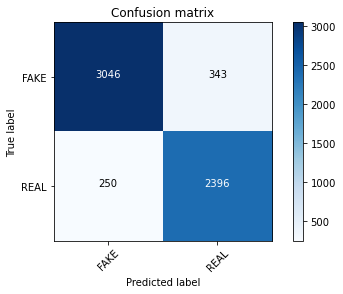

In [79]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy : %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm,classes = ['FAKE','REAL'])

# Passive Agressive Classifier

In [80]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter = 50)

accuracy: 0.917
Confusion matrix, without normalization
[[3122  267]
 [ 231 2415]]


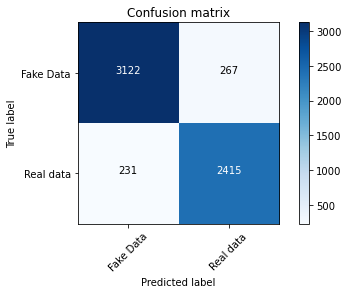

In [83]:
linear_clf.fit(X_train,y_train)
pred=linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes = ["Fake Data", "Real data"])

# Multinomial Classifier with Hyperparameter

In [84]:
classifier = MultinomialNB(alpha = 0.1)

In [88]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
            classifier = sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8906379453189727
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9022369511184756
Alpha: 0.30000000000000004, Score : 0.9019055509527755
Alpha: 0.4, Score : 0.9012427506213753
Alpha: 0.5, Score : 0.9010770505385253
Alpha: 0.6000000000000001, Score : 0.9017398508699255
Alpha: 0.7000000000000001, Score : 0.9022369511184756
Alpha: 0.8, Score : 0.9009113504556753
Alpha: 0.9, Score : 0.9014084507042254


In [92]:
#Get features names
feature_names = cv.get_feature_names()

In [93]:
classifier.coef_[0]

array([ -9.09965961,  -8.62203205,  -9.09965961, ..., -10.79425533,
        -8.91394246,  -9.32791826])

In [95]:
##Most real 
sorted(zip(classifier.coef_[0], feature_names),reverse=True)[:20]

[(-3.9994199281874554, 'trump'),
 (-4.287143466026011, 'hillari'),
 (-4.395660392643989, 'clinton'),
 (-4.899240497791205, 'elect'),
 (-5.175869372480226, 'new'),
 (-5.234001137931237, 'comment'),
 (-5.273238952556101, 'video'),
 (-5.3860875397004815, 'war'),
 (-5.396092625661444, 'us'),
 (-5.411290486570875, 'hillari clinton'),
 (-5.416408205007856, 'fbi'),
 (-5.47995525612455, 'vote'),
 (-5.565526247437875, 'email'),
 (-5.577509614324971, 'world'),
 (-5.633286151782383, 'obama'),
 (-5.733772227355374, 'donald'),
 (-5.762366026722114, 'donald trump'),
 (-5.784361048307661, 'russia'),
 (-5.845495436801029, 'day'),
 (-5.861381394389839, 'america')]